In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r"C:\Users\ahmed\Downloads\netflix_titles.csv")

# Data Structure And Missing Values

In [4]:
# Check Shape
print(df.shape)


(8807, 12)


In [5]:
df.isna().mean()*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

# Clean Column Names & Convert Date
 

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

# Extract Movie Duration In Minutes

In [7]:
def parse_duration(x):
    if pd.isna(x): return np.nan
    if "min" in str(x): return int(str(x).split()[0])
    return np.nan

df["duration_minutes"] = df["duration"].apply(parse_duration)

# Movies vs Tv Shows Distribution

In [8]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

# Release Trend Analysis

In [9]:
df["release_year"].value_counts().sort_index()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

# Top Content Producing Countries


In [10]:
df["country"].str.split(",").explode().str.strip().value_counts().head(10)

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64

# Genre Analysis 

In [11]:
df["listed_in"].str.split(",").explode().str.strip().value_counts().head(10)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

# Median Movie Length

In [14]:
df[df["type"]=="Movie"]["duration_minutes"].median()

np.float64(98.0)

# Graph 1: Movies vs TV Shows Distrubution

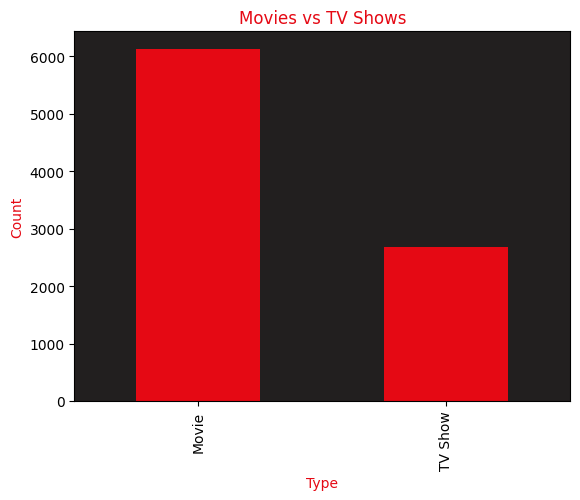

In [20]:
netflix_red = "#E50914"
netflix_bg = "#221F1F"

df["type"].value_counts().plot(kind="bar", color=netflix_red)

plt.title("Movies vs TV Shows", color=netflix_red)
plt.xlabel("Type", color=netflix_red)
plt.ylabel("Count", color=netflix_red)
plt.gca().set_facecolor(netflix_bg)
plt.show()

# Graph 2: Release Trend Over The Year 

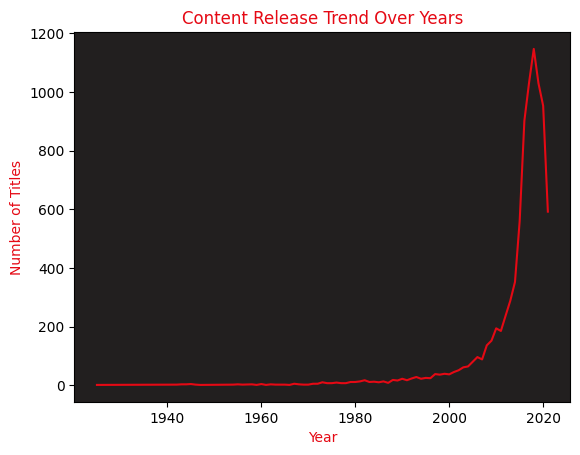

In [21]:
df["release_year"].value_counts().sort_index().plot(kind="line", color=netflix_red)

plt.title("Content Release Trend Over Years", color=netflix_red)
plt.xlabel("Year", color=netflix_red)
plt.ylabel("Number of Titles", color=netflix_red)
plt.gca().set_facecolor(netflix_bg)
plt.show()

# Graph 3: Top 10 Genres

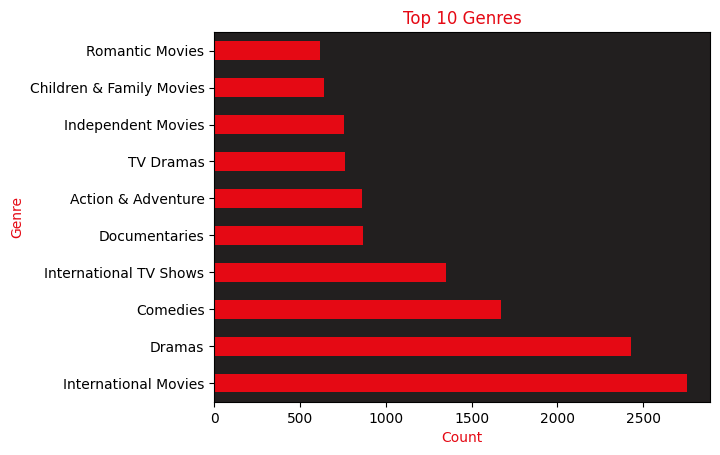

In [22]:
genres = df["listed_in"].str.split(",").explode().str.strip()
genres.value_counts().head(10).plot(kind="barh", color=netflix_red)

plt.title("Top 10 Genres", color=netflix_red)
plt.xlabel("Count", color=netflix_red)
plt.ylabel("Genre", color=netflix_red)
plt.gca().set_facecolor(netflix_bg)
plt.show()

# Graph 4: Top 10 Contnet Producing Countries 

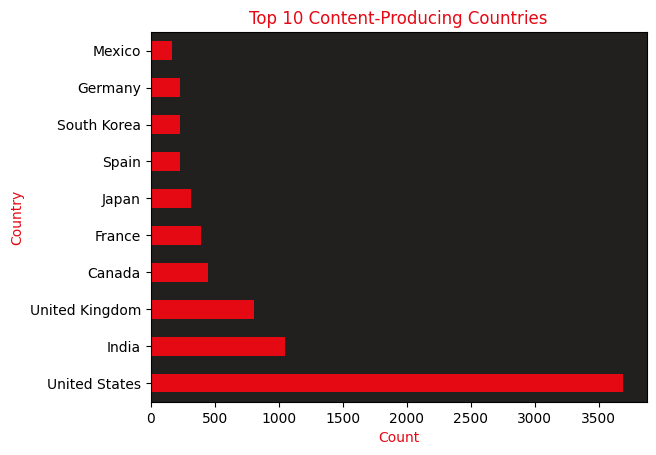

In [23]:
countries = df["country"].dropna().str.split(",").explode().str.strip()
countries.value_counts().head(10).plot(kind="barh", color=netflix_red)

plt.title("Top 10 Content-Producing Countries", color=netflix_red)
plt.xlabel("Count", color=netflix_red)
plt.ylabel("Country", color=netflix_red)
plt.gca().set_facecolor(netflix_bg)
plt.show()

# Graph 5: Rating Wise Distribution 

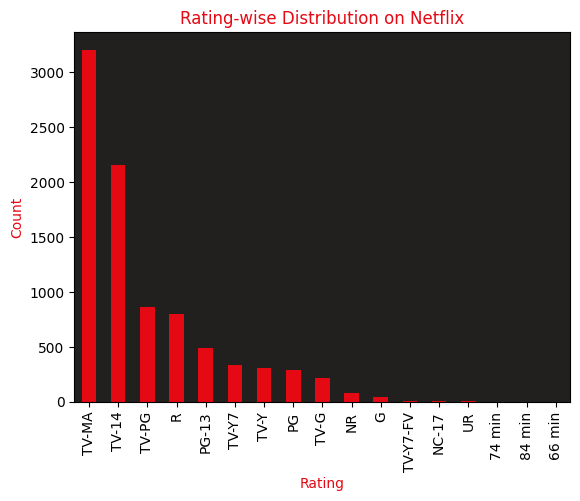

<Figure size 640x480 with 0 Axes>

In [ ]:

netflix_red = "#E50914"
df["rating"].value_counts().plot(kind="bar", color=netflix_red)

plt.title("Rating-wise Distribution on Netflix", color=netflix_red)
plt.xlabel("Rating", color=netflix_red)
plt.ylabel("Count", color=netflix_red)
plt.gca().set_facecolor("#221F1F")      
plt.figure(facecolor="#000000")         

plt.show()